<a href="https://colab.research.google.com/github/ABHIRAM199/my_practice/blob/main/Language_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Language Modeling

# Agenda
* Introduction: What is Language Modeling
* Types of Language Models
* Key Concepts in Language Modeling
* Applications of Language Modeling
* N-gram Models
* Key neural language models
* Evaluation metrics
* Training Techniques
* Advanced Topics
* Applications and Use Cases

#Introduction: What is Language Modeling?

- Language modeling is a fundamental task in natural language processing (NLP) that involves predicting the next word or sequence of words in a sentence given the preceding words. Language models are used to understand and generate human language, and they form the basis for various applications such as text generation, machine translation, speech recognition, and more.

**Key Concepts in Language Modeling
Probability Distribution Over Sequences:**
- Language models assign probabilities to sequences of words. This allows the model to predict the likelihood of different sequences occurring in a language.


**Types of Language Models:**
- **Unigram Model:** Assumes each word is independent of the others.
- **Bigram Model:** Considers pairs of words.
- **Trigram Model:** Considers triplets of words.
- **n-gram Model:** Generalizes the concept to n words.
- **Neural Language Models:** Use neural networks to capture more complex patterns in language.

**Applications of Language Models:**
- **Text Generation:** Creating coherent and contextually relevant sentences.
- **Machine Translation:** Translating text from one language to another.
- **Speech Recognition:** Converting spoken language into text.
- **Autocomplete and Spell Checking:** Predicting the next word or correcting spelling mistakes.

####Building a Simple Language Model

- This model will calculate the probability of a word given the previous word.

In [ ]:
import numpy as np
import nltk
from collections import defaultdict, Counter
from nltk.util import ngrams
from nltk.corpus import reuters
nltk.download('reuters')
nltk.download('punkt')


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the Reuters corpus
sentences = reuters.sents()

# Tokenize the sentences and create bigrams
bigrams = list(ngrams([word.lower() for sentence in sentences for word in sentence], 2))


In [ ]:
# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Count the frequency of each word
word_counts = Counter([word.lower() for sentence in sentences for word in sentence])

# Calculate the probability of a word given the previous word
bigram_prob = {bigram: count / word_counts[bigram[0]] for bigram, count in bigram_counts.items()}


In [ ]:
def predict_next_word(previous_word):
    # Filter the bigrams that start with the previous word
    candidates = {bigram: prob for bigram, prob in bigram_prob.items() if bigram[0] == previous_word}
    if not candidates:
        return None
    # Select the bigram with the highest probability
    return max(candidates, key=candidates.get)[1]

# Example usage
previous_word = 'the'
next_word = predict_next_word(previous_word)
print(f'The next word after "{previous_word}" is likely to be "{next_word}".')


The next word after "the" is likely to be "company".


#Types of Language Models

####**1. n-gram Language Models**

n-gram models are statistical models that predict the probability of a word based on the previous
n−1 words.

- **Unigram Model:** Assumes each word is independent of others.
- **Example:** P("dog") = count("dog") / total number of words

- **Bigram Model:** Considers pairs of words.
- **Example:** P("barks" | "dog") = count("dog barks") / count("dog")
- **Trigram Model:** Considers triplets of words.
- **Example:** P("loudly" | "dog barks") = count("dog barks loudly") / count("dog barks")
- **n-gram Model:** Generalizes the concept to sequences of n words.


**Advantages:**
- Simple and easy to implement.
- Fast to compute probabilities.

**Disadvantages:**
-
Limited context (only considers the last
n−1 words).
Data sparsity: Requires a large corpus to capture probabilities accurately.



#####Visualizing n-gram Model

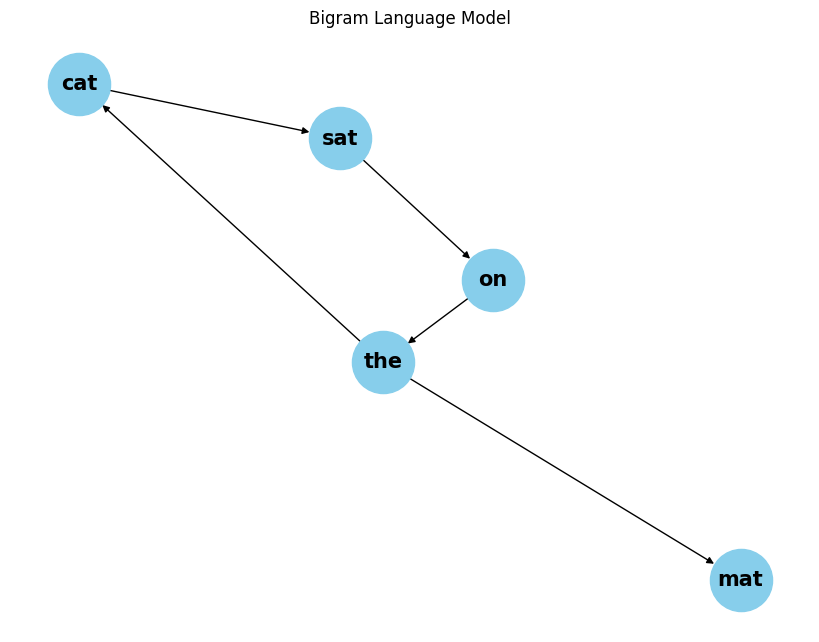

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Example bigram model
bigrams = [('the', 'cat'), ('cat', 'sat'), ('sat', 'on'), ('on', 'the'), ('the', 'mat')]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(bigrams)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold', arrows=True)
plt.title('Bigram Language Model')
plt.show()


####**2. Neural Language Models**

Neural language models use neural networks to capture complex patterns in language.

- **Feedforward Neural Networks:** Use fixed-size context windows to predict the next word.

 Example: Predicting the next word using a window of the previous three words.
- **Recurrent Neural Networks (RNNs):** Handle sequences of varying lengths and maintain hidden states that capture information from previous time steps.

 Example: Predicting the next word in a sentence by considering the entire preceding sequence.
- **Long Short-Term Memory Networks (LSTMs):** Address the vanishing gradient problem in RNNs by introducing gated mechanisms.

 Example: Handling long-term dependencies in text by using forget, input, and output gates.
- **Gated Recurrent Units (GRUs):** Simplified version of LSTMs with fewer gates.

 Example: Handling long-term dependencies with a simpler architecture than LSTMs.

**Advantages:**

- Can capture complex dependencies and long-term context.
More flexible and powerful compared to n-gram models.

**Disadvantages:**
- Computationally expensive to train.
- Require large datasets and significant computational resources.





#####Visualizing RNN Model

In [ ]:
from graphviz import Digraph

def visualize_rnn():
    g = Digraph('RNN', filename='rnn.gv')
    g.attr(rankdir='LR', size='8,5')

    g.attr('node', shape='circle')
    g.node('x[t-1]', 'x[t-1]')
    g.node('h[t-1]', 'h[t-1]')
    g.node('x[t]', 'x[t]')
    g.node('h[t]', 'h[t]')
    g.node('x[t+1]', 'x[t+1]')
    g.node('h[t+1]', 'h[t+1]')
    g.node('y[t]', 'y[t]')

    g.edge('x[t-1]', 'h[t-1]')
    g.edge('h[t-1]', 'h[t]')
    g.edge('x[t]', 'h[t]')
    g.edge('h[t]', 'y[t]')
    g.edge('x[t+1]', 'h[t+1]')
    g.edge('h[t]', 'h[t+1]')

    g.view()

visualize_rnn()


#####Visualizing LSTM Model

In [ ]:
def visualize_lstm():
    g = Digraph('LSTM', filename='lstm.gv')
    g.attr(rankdir='LR', size='10,5')

    g.attr('node', shape='record')

    g.node('input', 'Input')
    g.node('forget', 'Forget Gate')
    g.node('input_gate', 'Input Gate')
    g.node('cell_state', 'Cell State')
    g.node('output_gate', 'Output Gate')
    g.node('output', 'Output')

    g.edge('input', 'forget')
    g.edge('input', 'input_gate')
    g.edge('forget', 'cell_state')
    g.edge('input_gate', 'cell_state')
    g.edge('cell_state', 'output_gate')
    g.edge('output_gate', 'output')

    g.view()

visualize_lstm()


####**3. Transformers**

Transformers are neural models that use self-attention mechanisms to process entire sequences in parallel, leading to state-of-the-art performance in many NLP tasks.

- **BERT (Bidirectional Encoder Representations from Transformers):** Pre-trained on large corpora using masked language modeling and fine-tuned for specific tasks.

 Example: Understanding context by considering both left and right context of a word.
- **GPT (Generative Pre-trained Transformer):** Pre-trained in an unsupervised manner to predict the next word in a sequence and fine-tuned for specific tasks.
 Example: Generating coherent and contextually relevant text.
- **T5 (Text-to-Text Transfer Transformer):** Converts all NLP tasks into a text-to-text format.

 Example: Performing tasks like translation, summarization, and question answering by converting them into text-to-text format.

**Advantages:**
- Can handle long-range dependencies and context.
- Parallel processing enables efficient training and inference.
- State-of-the-art performance on a variety of NLP tasks.

**Disadvantages:**
- Extremely large models that require substantial computational resources.
- Training and fine-tuning can be time-consuming and expensive.

#####Visualizing Transformer Model

In [ ]:
def visualize_transformer():
    g = Digraph('Transformer', filename='transformer.gv')
    g.attr(rankdir='TB', size='12,10')

    g.attr('node', shape='box')

    g.node('input', 'Input Sequence')
    g.node('embedding', 'Embedding')
    g.node('encoder', 'Encoder')
    g.node('decoder', 'Decoder')
    g.node('output', 'Output Sequence')

    g.edge('input', 'embedding')
    g.edge('embedding', 'encoder')
    g.edge('encoder', 'decoder')
    g.edge('decoder', 'output')

    g.view()

visualize_transformer()


#Key Concepts in Language Modeling


- Language modeling is a fundamental task in natural language processing (NLP) that involves predicting the likelihood of a sequence of words. It serves as the foundation for various applications such as machine translation, text generation, and speech recognition. Below are the key concepts in language modeling:

**1. N-grams**
- Definition: N-grams are contiguous sequences of n items (words, characters) from a given sample of text.
Types:
- Unigram (n=1): Each word is considered independently.
- Bigram (n=2): Considers pairs of consecutive words.
- Trigram (n=3): Considers triplets of consecutive words.
- Usage: N-gram models are simple but effective for capturing local dependencies.

**2. Probability Distributions**
- Word Probability: Language models assign a probability to a sequence of words, reflecting how likely the sequence is to occur in a language.
- Chain Rule: The probability of a sequence of words can be decomposed using the chain rule of probability.
- Conditional Probability: Probability of a word given its preceding words.

**3. Smoothing Techniques**
- Purpose: To handle the problem of zero probabilities for unseen n-grams in the training data.
Methods:
- Additive Smoothing (Laplace Smoothing): Adds a small constant to all counts.
- Good-Turing Discounting: Adjusts the probability of seen and unseen n-grams based on their frequencies.

**4. Perplexity**
- Definition: A measure of how well a language model predicts a sample. Lower perplexity indicates a better model.
   $Perplexity (P) = 2^{-\frac{1}{N}}$


#Applications of Language Modeling

####Text Generation

- **Creative Writing:** Generating poems, stories, and scripts.
- **Content Creation:** Assisting in generating articles, blogs, and other written content.
- **Dialogue Systems:** Creating responses in chatbots and conversational agents.





####Machine Translation

- **Translating Texts:** Converting text from one language to another automatically.
- **Real-time Translation:** Assisting in real-time communication between speakers of different languages.

####Speech Recognition

- **Transcription Services:** Converting spoken language into written text.
- **Voice Assistants:** Enhancing the ability of virtual assistants (like Siri, Alexa) to understand and process spoken commands.


Text Summarization

- **Extractive Summarization:** Extracting key sentences from a text to create a summary.
- **Abstractive Summarization:** Generating a concise and coherent summary by understanding the text content.

####Sentiment Analysis

- **Opinion Mining:** Analyzing customer reviews, social media posts, and other textual data to determine sentiment (positive, negative, neutral).
- **Market Research:** Understanding public sentiment towards products, brands, or topics.


####Named Entity Recognition (NER)

- **Identifying Entities:** Recognizing names of people, organizations, locations, dates, etc., in text.
- **Data Annotation:** Assisting in creating annotated datasets for various NLP tasks.

####Code Generation and Analysis

- **Programming Assistants:** Assisting developers by generating code snippets and auto-completing code.
- **Code Translation:** Converting code from one programming language to another.


####Text-to-Speech (TTS) Systems

- **Voice Synthesis:** Converting written text into spoken language, useful in audiobooks, navigation systems, and assistive technologies for the visually impaired.

#N-gram Models

Understanding Unigrams, Bigrams, Trigrams, and Higher-Order N-grams
- N-gram models are a type of probabilistic language model used for predicting the next item in a sequence, based on the (N-1) previous items.

**Unigrams:**
- Definition: Unigrams are single words. A unigram model considers each word independently.
- Example: For the sentence "I love machine learning", the unigrams are "I", "love", "machine", "learning".
- Usage: Useful for tasks like word frequency analysis.

**Bigrams:**
- Definition: Bigrams are pairs of consecutive words. A bigram model considers the probability of a word given the previous word.
- Example: For the sentence "I love machine learning", the bigrams are "I love", "love machine", "machine learning".
- Formula: $P(w_i|w_i-1)$

**Trigrams:**
- Trigrams are n-grams of size 3, where each token in the sequence is predicted based on the two preceding tokens.
- They capture more contextual information compared to bigrams because they consider two preceding words when predicting the next word.
- For example, in the same sentence "I love natural language processing", the trigrams would be "I love natural", "love natural language", and "natural language processing".


**Higher-order n-grams:**
- Higher-order n-grams are n-grams of size greater than 3, where each token in the sequence is predicted based on more than two preceding tokens.
- These n-grams capture even more contextual information and are used in tasks where fine-grained context is essential.

**Smoothing Techniques:**
- Smoothing techniques are used to handle unseen n-grams and prevent zero probabilities, especially in cases where the training data is sparse.
- Two common smoothing techniques are:

**a. Laplace Smoothing (Add-One Smoothing):**
- Laplace smoothing adds a small constant to each count in the frequency table before calculating probabilities. This ensures that no probability is zero, and it distributes the probability mass evenly among all possible outcomes.

**b. Kneser-Ney Smoothing:**
- Kneser-Ney smoothing is a more advanced technique that considers both higher and lower-order n-grams. It uses back-off and interpolation methods to estimate probabilities.
- Kneser-Ney smoothing is particularly effective for larger n-gram models and helps improve the accuracy of language models.

In [ ]:
from collections import Counter

def generate_ngrams(text, n):
    tokens = text.split()
    ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
    return ngrams

def laplace_smoothing(ngram_counts, vocabulary_size):
    total_count = sum(ngram_counts.values())  # Calculate the total count of all bigrams
    smoothed_counts = {ngram: (count + 1) / (total_count + vocabulary_size)
                       for ngram, count in ngram_counts.items()}
    return smoothed_counts

# Example text
text = "I love natural language processing"

# Generate bigrams
bigrams = generate_ngrams(text, 2)
print("Bigrams:", bigrams)

# Count occurrences of bigrams
bigram_counts = Counter(bigrams)
print("Bigram Counts:", bigram_counts)

# Apply Laplace smoothing to bigram counts
vocabulary_size = len(set(text.split()))  # Assuming vocabulary size is the count of unique words
smoothed_bigram_counts = laplace_smoothing(bigram_counts, vocabulary_size)
print("Smoothed Bigram Probabilities:", smoothed_bigram_counts)


Bigrams: [('I', 'love'), ('love', 'natural'), ('natural', 'language'), ('language', 'processing')]
Bigram Counts: Counter({('I', 'love'): 1, ('love', 'natural'): 1, ('natural', 'language'): 1, ('language', 'processing'): 1})
Smoothed Bigram Probabilities: {('I', 'love'): 0.2222222222222222, ('love', 'natural'): 0.2222222222222222, ('natural', 'language'): 0.2222222222222222, ('language', 'processing'): 0.2222222222222222}


#Key neural language models:

**1. Feedforward Neural Networks (FNNs):**
- Feedforward neural networks are the simplest form of neural networks, where information flows in one direction, from input to output. They consist of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons (or units) that perform computations on the input data. FNNs are primarily used for tasks like classification and regression.

**2. Recurrent Neural Networks (RNNs):**
- RNNs are a type of neural network designed to handle sequential data. They have connections that form directed cycles, allowing them to maintain a memory of past inputs. This enables RNNs to model dependencies in sequential data. However, traditional RNNs suffer from the vanishing gradient problem, which limits their ability to capture long-range dependencies.

**3. Long Short-Term Memory (LSTM):**
- LSTM is a variant of RNNs designed to address the vanishing gradient problem. It introduces specialized units called memory cells and gates that regulate the flow of information within the network. LSTMs can capture long-range dependencies in sequential data and are widely used in tasks such as speech recognition, language modeling, and machine translation.

**4. Gated Recurrent Units (GRUs):**
- GRUs are another variant of RNNs that address the vanishing gradient problem. They simplify the architecture of LSTMs by combining the forget and input gates into a single update gate. This results in a more streamlined architecture while still maintaining the ability to capture long-range dependencies. GRUs are often preferred in scenarios where computational resources are limited.

**5. Transformer Architecture:**
- The Transformer architecture revolutionized natural language processing with its attention mechanism. Unlike RNNs, Transformers process entire sequences of data in parallel, making them highly efficient for training on modern hardware. Transformers consist of an encoder and a decoder, each composed of multiple layers of self-attention mechanisms and feedforward neural networks. They have achieved state-of-the-art performance in tasks such as machine translation, text generation, and question answering.

**Transformer Variants:**
- **BERT (Bidirectional Encoder Representations from Transformers):** BERT is a pre-trained Transformer-based model developed by Google. It is trained on large amounts of unlabeled text data using masked language modeling and next sentence prediction objectives. BERT can be fine-tuned for various downstream NLP tasks, such as text classification, named entity recognition, and sentiment analysis.
- **GPT (Generative Pre-trained Transformer):** GPT is a series of autoregressive language models developed by OpenAI. It uses a left-to-right architecture and is trained on a large corpus of text data to generate coherent and contextually relevant text. GPT models have been used for text generation, language understanding, and dialogue systems.
- **T5 (Text-to-Text Transfer Transformer):** T5 is a Transformer-based model developed by Google that approaches various NLP tasks using a unified text-to-text framework. It casts all tasks into a text-to-text format, where both the input and output are natural language sentences. T5 achieves state-of-the-art results on a wide range of NLP tasks, including translation, summarization, and question answering.


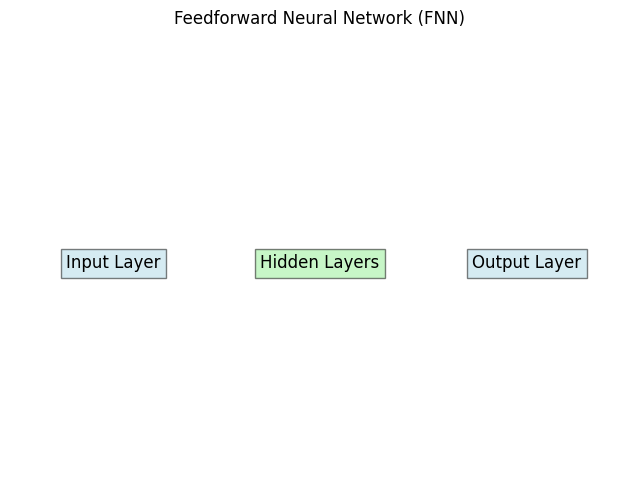

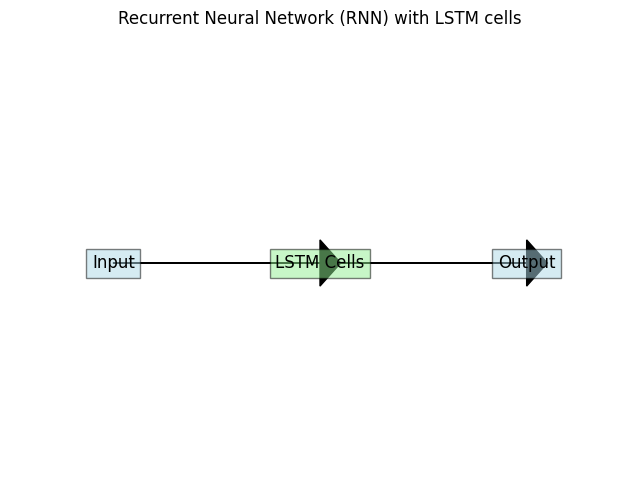

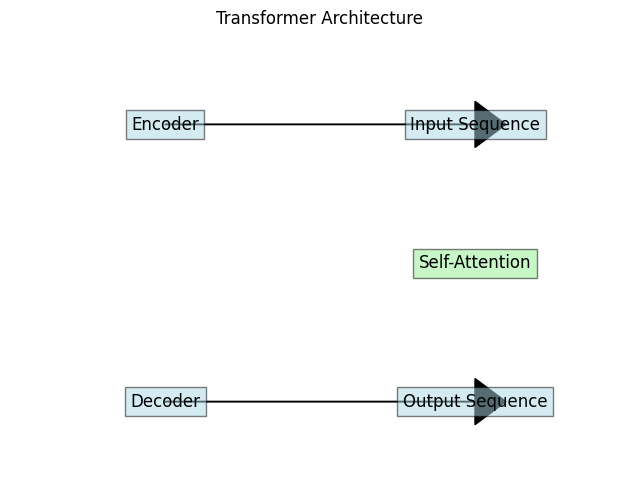

In [ ]:
import matplotlib.pyplot as plt

# Visualization for Feedforward Neural Network (FNN)
def visualize_fnn():
    plt.figure(figsize=(8, 6))
    plt.title("Feedforward Neural Network (FNN)")
    plt.text(0.5, 0.5, "Input Layer", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(1.5, 0.5, "Hidden Layers", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.text(2.5, 0.5, "Output Layer", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.xlim(0, 3)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.show()

# Visualization for Recurrent Neural Network (RNN) with LSTM cells
def visualize_rnn_lstm():
    plt.figure(figsize=(8, 6))
    plt.title("Recurrent Neural Network (RNN) with LSTM cells")
    plt.text(0.5, 0.5, "Input", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(1.5, 0.5, "LSTM Cells", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.text(2.5, 0.5, "Output", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.arrow(0.5, 0.5, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.arrow(1.5, 0.5, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.xlim(0, 3)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.show()

# Visualization for Transformer model
def visualize_transformer():
    plt.figure(figsize=(8, 6))
    plt.title("Transformer Architecture")
    plt.text(0.5, 0.8, "Encoder", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(0.5, 0.2, "Decoder", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(1.5, 0.5, "Self-Attention", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
    plt.text(1.5, 0.8, "Input Sequence", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.text(1.5, 0.2, "Output Sequence", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.arrow(0.5, 0.8, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.arrow(0.5, 0.2, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.xlim(0, 2)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.show()

# Visualize FNN
visualize_fnn()

# Visualize RNN with LSTM cells
visualize_rnn_lstm()

# Visualize Transformer
visualize_transformer()


#Evaluation metrics:

####**1. Perplexity:**
Perplexity is a common evaluation metric used in language modeling tasks. It measures how well a probability model predicts a sample. Lower perplexity indicates better performance. For a language model, perplexity is calculated as the inverse probability of the test set, normalized by the number of words:

Perplexity: $N\sqrt{1/P(w_1,w_2,...,w_N)}$

where
- N is the number of words in the test set.
- $P(w_1,w_2,.....w_n)$ is the probability assigned to the entire test set by the language model.




####**2. BLEU Score (Bilingual Evaluation Understudy):**

- BLEU is a metric commonly used to evaluate the quality of machine-translated text by comparing it to one or more reference translations.
- It computes a similarity score based on n-gram precision and brevity penalty.

####**3. ROUGE Score (Recall-Oriented Understudy for Gisting Evaluation):**

- ROUGE is a set of metrics used for evaluating summarization tasks by comparing the generated summary against one or more reference summaries.
- It measures the overlap between n-grams (typically uni-grams, bi-grams, and tri-grams) in the generated summary and the reference summaries.

- Metrics using libraries such as NLTK and Rouge:

In [ ]:
!pip install rouge


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge import Rouge

# Sample machine translations and references
translations = ['I love natural language processing.', 'I adore language processing.']
references = [['I like natural language processing.'], ['I love language processing.']]

# Flatten the references list
references_flat = [ref for sublist in references for ref in sublist]

# BLEU Score
bleu_score = corpus_bleu(references_flat, translations)
print("BLEU Score:", bleu_score)

# ROUGE Score
rouge = Rouge()
scores = rouge.get_scores(translations, references_flat)
rouge_1_recall = sum(score['rouge-1']['r'] for score in scores) / len(scores)
rouge_2_recall = sum(score['rouge-2']['r'] for score in scores) / len(scores)
rouge_l_recall = sum(score['rouge-l']['r'] for score in scores) / len(scores)
print("ROUGE-1 Recall:", rouge_1_recall)
print("ROUGE-2 Recall:", rouge_2_recall)
print("ROUGE-L Recall:", rouge_l_recall)


BLEU Score: 1.525856210402496e-231
ROUGE-1 Recall: 0.775
ROUGE-2 Recall: 0.41666666666666663
ROUGE-L Recall: 0.775


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

#Training Techniques:

**1. Supervised Learning with Labeled Datasets:**
- In supervised learning, we have a labeled dataset where each input example is associated with a corresponding output label.
-  The goal is to learn a mapping from inputs to outputs by minimizing a loss function that measures the difference between predicted and true labels. This approach is effective when we have access to labeled data, allowing the model to directly learn from the provided supervision. Supervised learning is commonly used for tasks like text classification, sentiment analysis, named entity recognition, and machine translation.

**2. Unsupervised and Semi-Supervised Learning for Pre-training Language Models on Large Corpora:**
- Unsupervised learning involves training models on unlabeled data, allowing them to learn patterns and structures without explicit supervision. Pre-training language models on large corpora using unsupervised learning techniques, such as autoencoders or self-supervised learning, enables them to capture general language representations.
- These pre-trained models can then be fine-tuned on downstream tasks with limited labeled data, a technique known as semi-supervised learning. Unsupervised and semi-supervised learning approaches are particularly valuable when labeled data is scarce or expensive to obtain.

**3. Fine-tuning Pre-trained Models for Specific Tasks:**
- Fine-tuning involves taking a pre-trained model, such as BERT or GPT, and adapting it to a specific downstream task by further training it on task-specific labeled data. Fine-tuning leverages the knowledge learned during pre-training and allows the model to specialize for the target task.
- This approach is highly effective, especially when the pre-trained model has been trained on a diverse range of data and tasks. Fine-tuning pre-trained models has become a common practice in natural language processing for achieving state-of-the-art performance across various tasks, including text classification, question answering, and text generation.

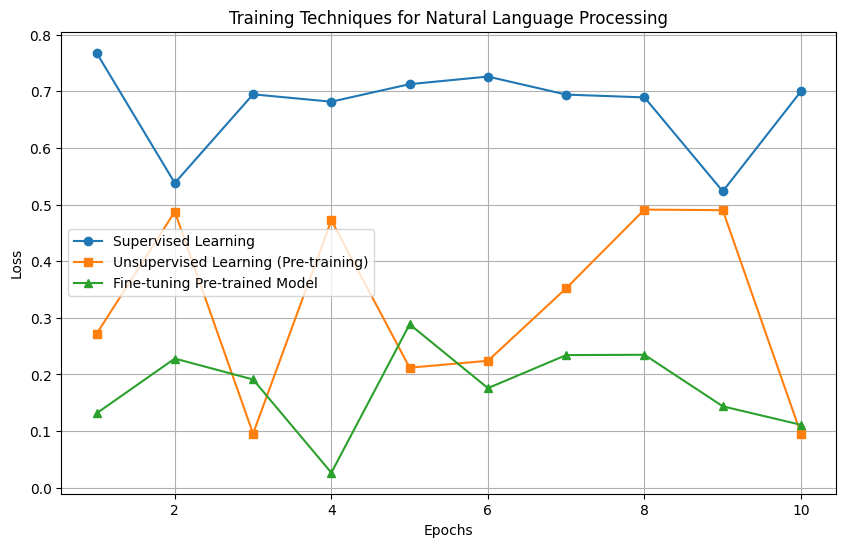

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
epochs = np.arange(1, 11)
supervised_loss = np.random.rand(10) * 0.5 + 0.5  # Random supervised loss values
unsupervised_loss = np.random.rand(10) * 0.5       # Random unsupervised loss values
fine_tuning_loss = np.random.rand(10) * 0.3        # Random fine-tuning loss values

# Plotting the losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, supervised_loss, marker='o', label='Supervised Learning')
plt.plot(epochs, unsupervised_loss, marker='s', label='Unsupervised Learning (Pre-training)')
plt.plot(epochs, fine_tuning_loss, marker='^', label='Fine-tuning Pre-trained Model')
plt.title('Training Techniques for Natural Language Processing')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#Advanced Topics:

####**1. Transfer Learning in NLP:**
- Transfer learning involves leveraging knowledge gained from one task or domain to improve performance on another related task or domain.
- In NLP, transfer learning has become increasingly popular, especially with the advent of pre-trained language models like BERT, GPT, and their variants. These models are trained on large text corpora and can be fine-tuned on specific downstream tasks with limited labeled data.

- Transfer learning in NLP allows models to capture rich linguistic patterns and semantic representations, leading to improved performance across various tasks, including text classification, sentiment analysis, machine translation, and question answering.

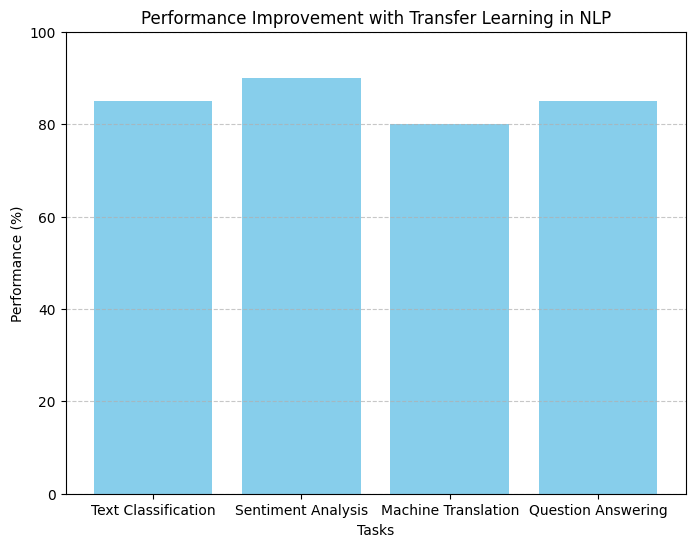

In [ ]:
import matplotlib.pyplot as plt

# Data
tasks = ['Text Classification', 'Sentiment Analysis', 'Machine Translation', 'Question Answering']
performance = [85, 90, 80, 85]  # Performance scores after transfer learning (%)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(tasks, performance, color='skyblue')
plt.title('Performance Improvement with Transfer Learning in NLP')
plt.xlabel('Tasks')
plt.ylabel('Performance (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


####**2. Zero-shot and Few-shot Learning with Language Models:**
- Zero-shot learning refers to the ability of models to perform a task without any specific examples or training data. Few-shot learning extends this concept by allowing models to learn from a very small number of examples.

- Language models like GPT-3 have demonstrated impressive capabilities in zero-shot and few-shot learning, where they can generate coherent and contextually relevant text for tasks they were not explicitly trained on.
- These models achieve this by leveraging the vast amount of pre-training data and learning to generalize from it to new tasks or domains.

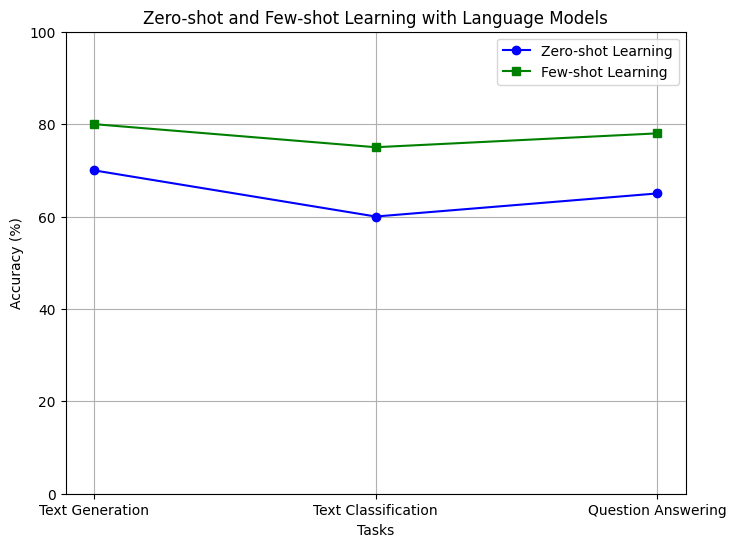

In [ ]:
import matplotlib.pyplot as plt

# Data
tasks = ['Text Generation', 'Text Classification', 'Question Answering']
zero_shot_accuracy = [70, 60, 65]  # Zero-shot accuracy (%)
few_shot_accuracy = [80, 75, 78]   # Few-shot accuracy (%)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(tasks, zero_shot_accuracy, marker='o', label='Zero-shot Learning', color='blue')
plt.plot(tasks, few_shot_accuracy, marker='s', label='Few-shot Learning', color='green')
plt.title('Zero-shot and Few-shot Learning with Language Models')
plt.xlabel('Tasks')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.show()


####**3. Ethical Considerations and Bias in Language Models:**
- Ethical considerations and bias are important considerations in the development and deployment of language models.
- Language models trained on large text corpora may inadvertently perpetuate biases present in the training data, leading to biased or unfair outcomes, especially for marginalized groups.
- Ethical concerns also arise in the generation of potentially harmful or misleading content by language models. Addressing bias and ensuring fairness in language models require careful data curation, model design, and evaluation strategies, as well as transparency and accountability in model development and deployment.

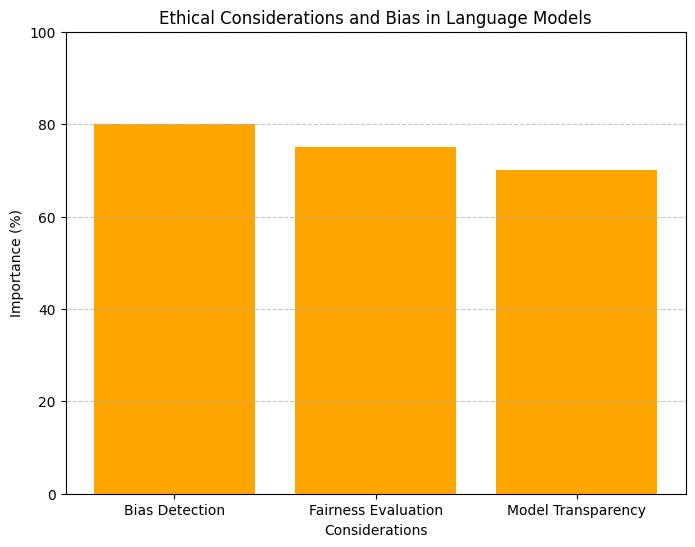

In [ ]:
import matplotlib.pyplot as plt

# Data
considerations = ['Bias Detection', 'Fairness Evaluation', 'Model Transparency']
importance = [80, 75, 70]  # Importance (0-100)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(considerations, importance, color='orange')
plt.title('Ethical Considerations and Bias in Language Models')
plt.xlabel('Considerations')
plt.ylabel('Importance (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


####**4. Scaling Up Models and Computational Efficiency:**
- As language models continue to grow in size and complexity, scaling up models and ensuring computational efficiency become crucial challenges.
- Large-scale models like GPT-3 and T5 require massive computational resources for training and inference, making them inaccessible to many researchers and practitioners.
- Techniques such as distributed training, model parallelism, and hardware accelerators (e.g., GPUs, TPUs) are used to scale up models efficiently.
- Additionally, model compression, knowledge distillation, and quantization techniques aim to reduce the computational cost of deploying large models in production environments while maintaining performance.

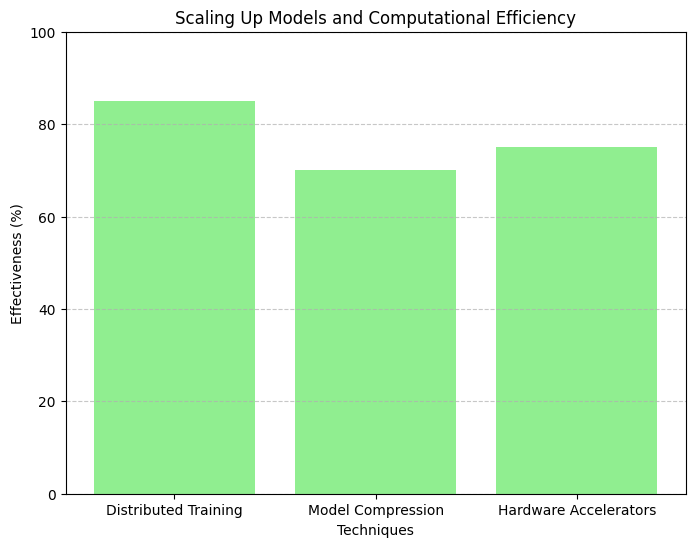

In [ ]:
import matplotlib.pyplot as plt

# Data
techniques = ['Distributed Training', 'Model Compression', 'Hardware Accelerators']
effectiveness = [85, 70, 75]  # Effectiveness in improving computational efficiency (%)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(techniques, effectiveness, color='lightgreen')
plt.title('Scaling Up Models and Computational Efficiency')
plt.xlabel('Techniques')
plt.ylabel('Effectiveness (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Applications and Use Cases

####**1. Practical Implementations in Chatbots, Virtual Assistants, and Customer Support:**
- Language models are widely used in chatbots, virtual assistants, and customer support systems to understand and generate natural language responses.
- They help these systems comprehend user queries, provide relevant information, and engage in conversations.
- Here's a simplified Python implementation of a basic chatbot using the NLTK library:

In [ ]:
import re
from nltk.chat.util import Chat, reflections

# Define chatbot patterns and responses
patterns_responses = [
    (r"hi", "Hello, how can I assist you today?"),
    (r"bye", "Goodbye! Have a great day."),
    (r"how are you", "I'm doing well, thank you for asking."),
    (r".*", "I'm sorry, I didn't understand that."),
]

# Define chatbot rules
chatbot = Chat(patterns_responses, reflections)

# Start chatting
print("Welcome to the Chatbot!")
while True:
    user_input = input("You: ")
    response = chatbot.respond(user_input)
    print("Bot:", responses)
    if user_input.lower() == 'bye':
        break


Welcome to the Chatbot!
You: hi
Bot: {'hi': 'Hello, how can I assist you today?', 'bye': 'Goodbye! Have a great day.', 'how are you': "I'm doing well, thank you for asking.", 'default': "I'm sorry, I didn't understand that."}
You: bye
Bot: {'hi': 'Hello, how can I assist you today?', 'bye': 'Goodbye! Have a great day.', 'how are you': "I'm doing well, thank you for asking.", 'default': "I'm sorry, I didn't understand that."}


####**2. Use in Automatic Code Generation and Completion in Software Development Tools:**
- Language models are also employed in software development tools for automatic code generation and completion.
- They assist developers by predicting the next code snippet based on the context, improving productivity and reducing errors.
- Here's a simple example of using the TabNine library for code autocompletion in Python:

In [ ]:
# Install jedi library
!pip install jedi

# Import jedi
import jedi

# Example usage
code = """
def greet():
    return "Hello, World!"

# After typing "gre", Jedi suggests autocompletions like greet(), greet_user(), etc.
"""

# Perform autocompletion
script = jedi.Script(code, path='example.py')
completions = script.complete(line=5, column=5)
print("Autocompletions")
for completion in completions:
    print(completion.name)


Autocompletions
